# Simple Exploratory Data Analysis Exercise

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


## Downloading Kaggle Dataset from PIMA Indians Diabetes Database
[Download here](https://www.kaggle.com/uciml/pima-indians-diabetes-database/version/1)

### Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

### Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [20]:
df_diabetes = pd.read_csv("diabetes.csv")
df_diabetes.head(7)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1

In [13]:
# View number of column and rows

df_diabetes.shape

(768, 9)

In [14]:
# View column types

df_diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [52]:
# Check your data for nulls

df_diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [50]:
# Check for summary of distribution each column

df_diabetes.describe().transpose()

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

In [22]:
# Looking closer at how many people with diabetes we have in the data

outcome = df_diabetes.Outcome.value_counts()
outcome

0    500
1    268
Name: Outcome, dtype: int64

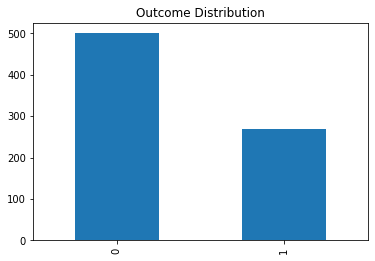

In [27]:
outcome.plot(kind='bar')
plt.title("Outcome Distribution")
plt.show()

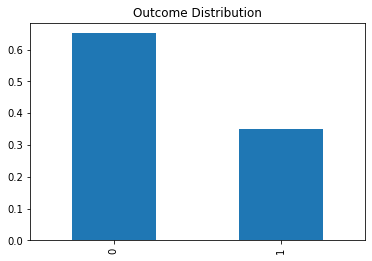

In [29]:
# I want percentages instead

outcome_pct = outcome / len(df_diabetes)

outcome_pct.plot(kind='bar')
plt.title("Outcome Distribution")
plt.show()

In [49]:
# What is the average blood pressure for those with diabetes versus without?
# Fort this, we can group by outcome column and aggregate mean by blood pressure column

df_diabetes.groupby('Outcome')['BloodPressure'].mean()

Outcome
0    68.184000
1    70.824627
Name: BloodPressure, dtype: float64

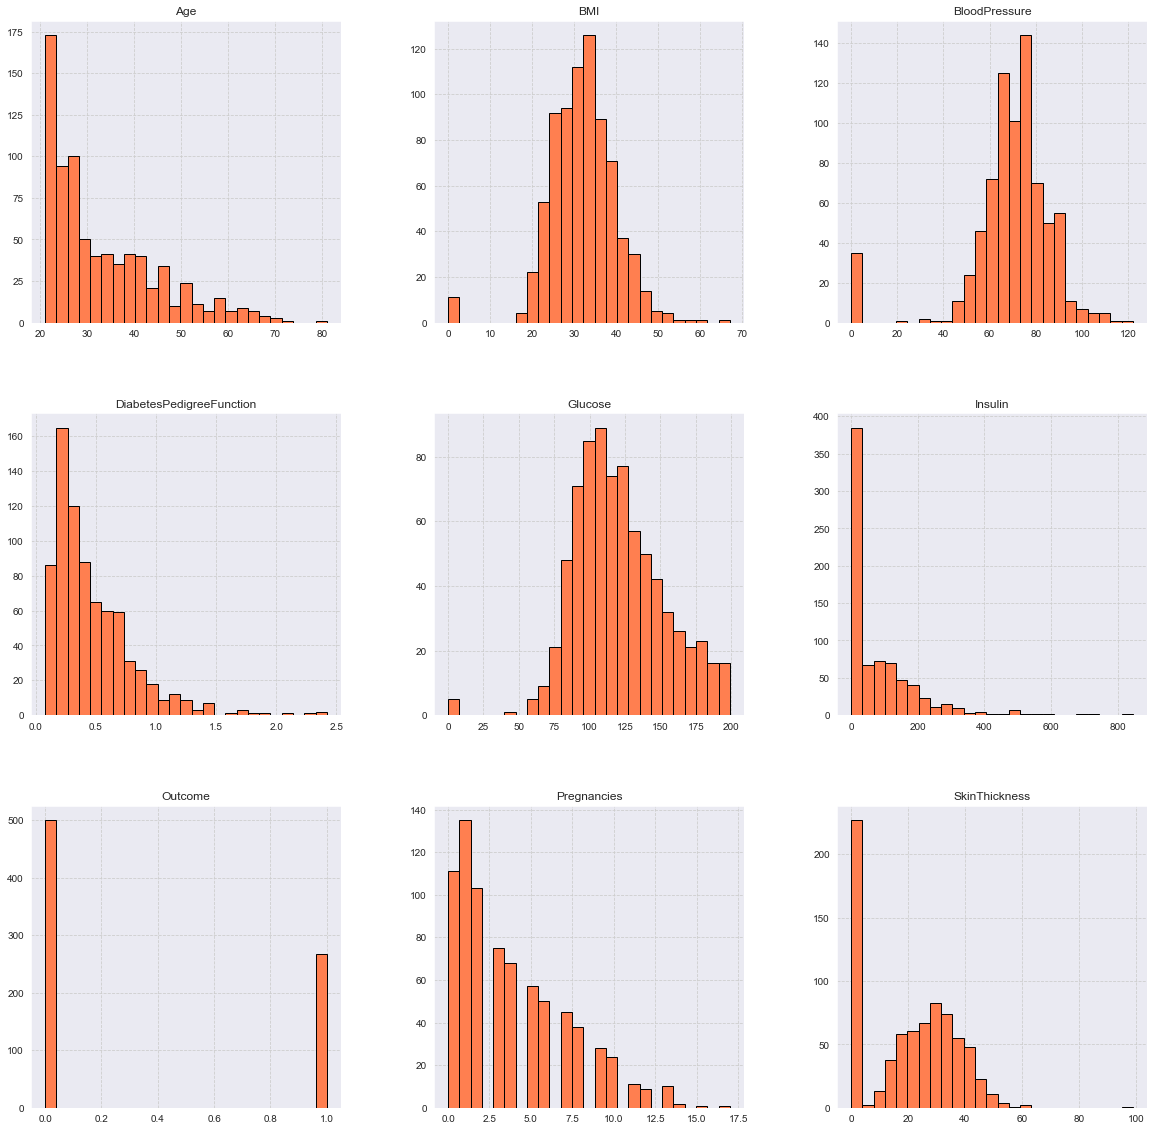

In [51]:
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
df_diabetes.hist(figsize = (20,20),bins=25,color='#ff7f50',edgecolor="black")
plt.show()

Finding outliers in the data

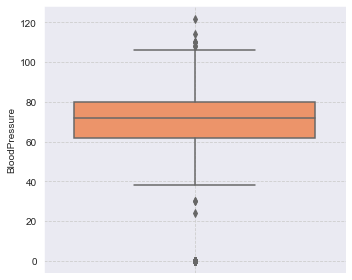

In [55]:
plt.figure(figsize=(5,4))
sns.boxplot(y=df_diabetes['BloodPressure'],palette='OrRd_r',saturation=0.8)
plt.tight_layout()
plt.grid(True)
plt.show()

## Visualizing two variables: Glucose Levels and Insulin

In [44]:
fig = px.scatter(df_diabetes, x="Glucose", y="Insulin")
fig.show()

There is a positive correlation between the variables glucose and insulin. This makes sense, because a person with higher glucose levels would be expected to take more insulin.

## Visualize Outcome and Age

In [46]:
fig = px.box(df_diabetes, x='Outcome', y='Age')
fig.update_traces(marker_color="midnightblue",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Age and Outcome')
fig.show()

From the plot above, you can see that older people are more likely to have diabetes. The median age for adults with diabetes is around 35, while it is much lower for people without diabetes.


## Visualizing BMI and Outcome


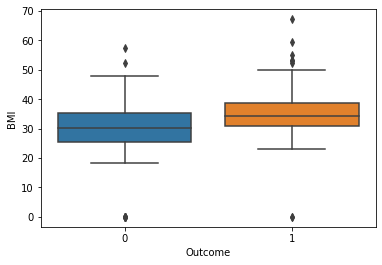

In [48]:
plot = sns.boxplot(x='Outcome',y="BMI",data=df_diabetes)


### Pairplot

From the box plot above, we can see that higher BMI correlates with a positive outcome. People with diabetes tend to have higher BMI’s than people without diabetes.

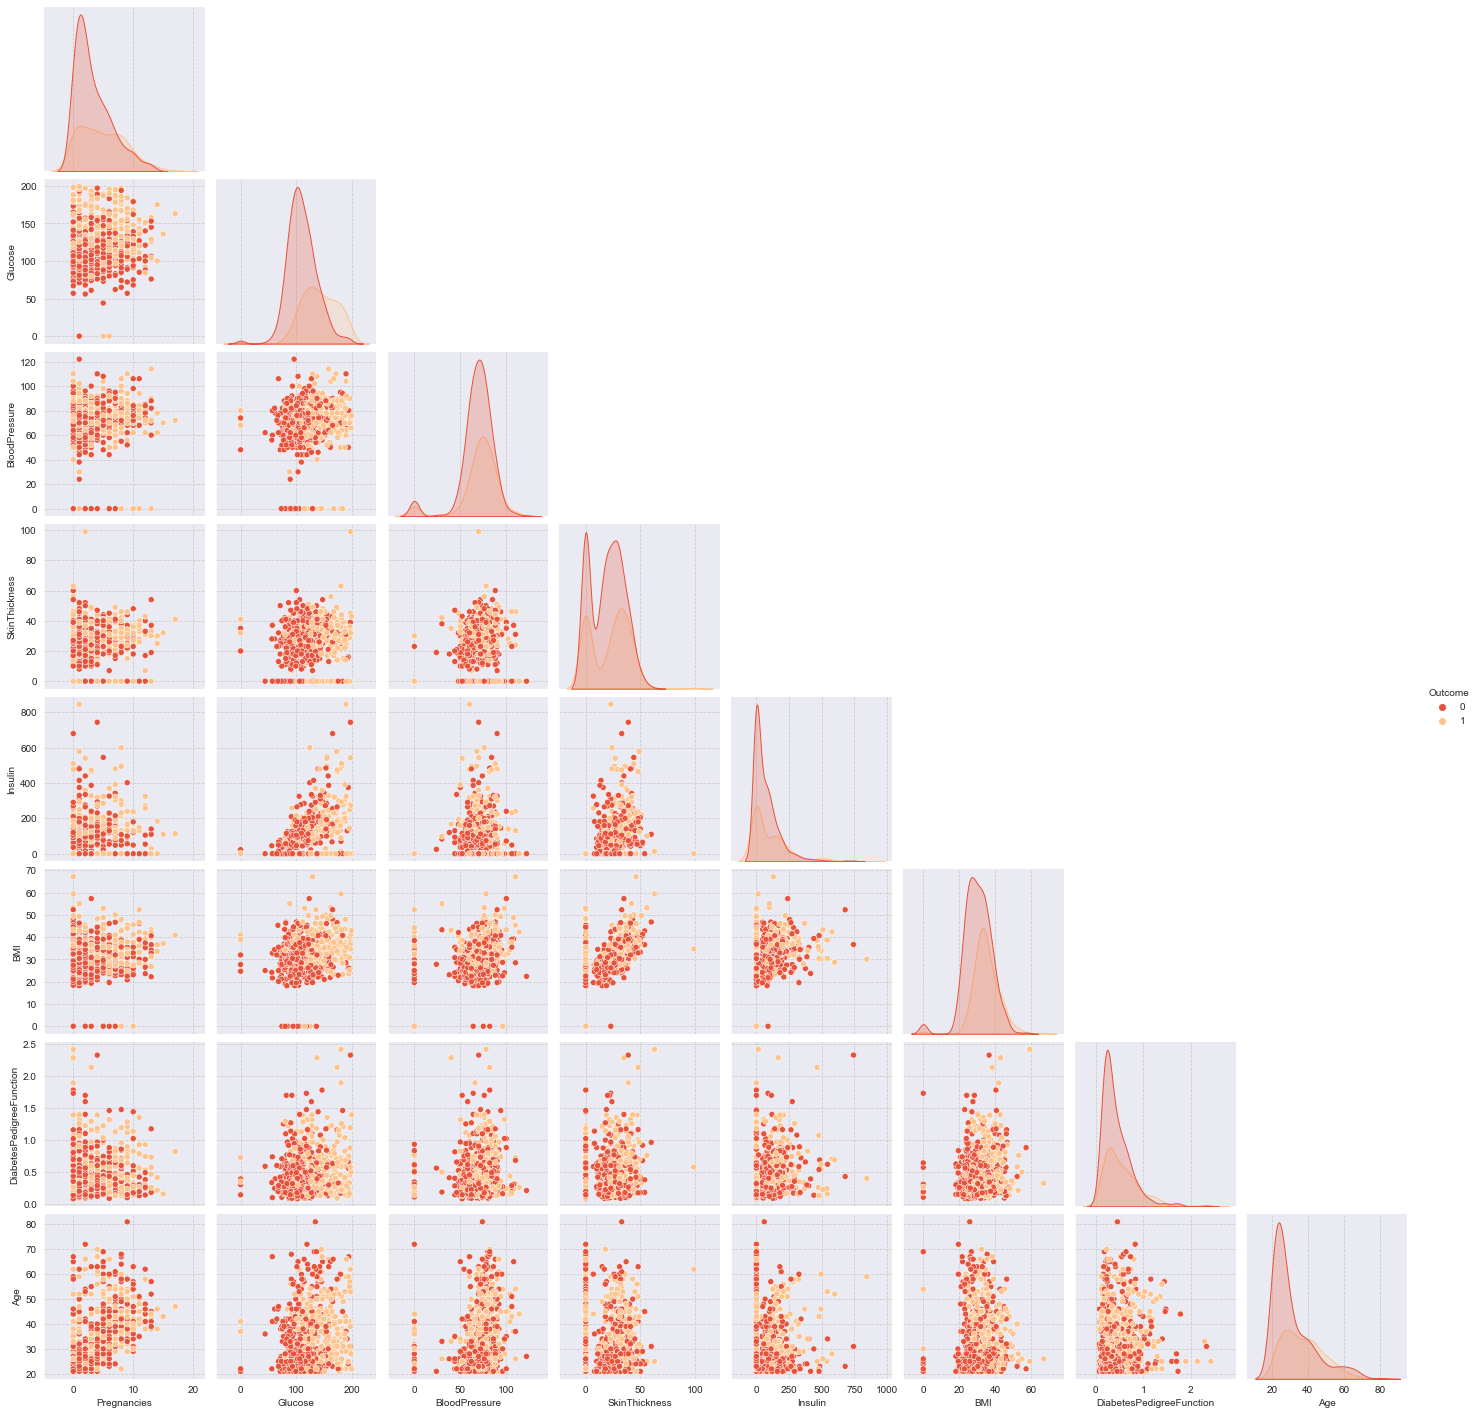

In [ ]:
sns.pairplot(df_diabetes,palette='OrRd_r',hue='Outcome',corner=True)
plt.show()

From above pairplot we can see that:

* A person with high Glucose can be diabetic.
* A person with thick tricep skin can be diabetic.
* A person with high BMI can be diabetic.

* Positive correlation between Insulin and Glucose 
* Positive correlation between BMI and Skin Thickness 

## Plotting Correlation Matrix

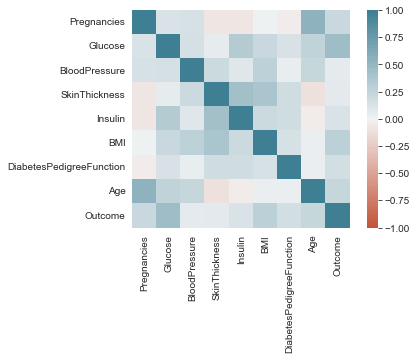

In [59]:
corr = df_diabetes.corr()
corr

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

In [30]:
import pandas_profiling as pp
pp.ProfileReport(df_diabetes)

Render HTML: 100%|██████████| 1/1 [00:03<00:00,  3.01s/it]


## As an analyst, this report saves a lot of time, as we don't have to go through each individual variable and run too many lines of code

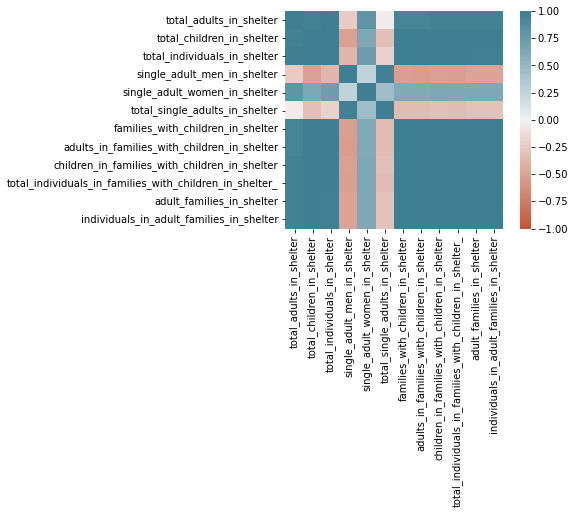

In [11]:
corr = df_homeless.corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

In [ ]:
# Extracting day of week from the date column

df_homeless.date_of_census.dt.day_name()

df_homeless['day_of_week'] = df_homeless.date_of_census.dt.day_name()
df_homeless[['date_of_census','day_of_week']].sort_values('date_of_census')

date_of_census day_of_week
999     2019-02-03      Sunday
998     2019-02-04      Monday
997     2019-02-05     Tuesday
996     2019-02-06   Wednesday
995     2019-02-07    Thursday
..             ...         ...
4       2021-10-28    Thursday
3       2021-10-29      Friday
2       2021-10-30    Saturday
1       2021-10-31      Sunday
0       2021-11-01      Monday

[1000 rows x 2 columns]